
## Lendo uma imagem

In [5]:
!python3 -m pip install --upgrade google-cloud-vision

  Using cached https://files.pythonhosted.org/packages/f2/bf/112a0707a425961516693ac526725bc3f51db44fc3d02998da3ee2b82ef1/google_cloud_vision-0.36.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bf/e4/b22222bb714947eb459dc91ebf95131812126a0b29d62e444be3f76dad64/google_api_core-1.9.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/9b/ed0516cc1f7609fb0217e3057ff4f0f9f3e3ce79a369c6af4a6c5ca25664/google_auth-1.6.3-py2.py3-none-any.whl
    100% |████████████████████████████████| 512kB 7.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/39/2b/d87fc2369242bd743883232c463f28205902b8579cb68dcf5b11eee1652f/cachetools-3.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/e5/38518af393f7c214357079ce67a317307936896e961e35450b70fad2a9cf/rsa-4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/da/98/8ddd9fa4d84065926832bcf2255a2b69f1d03330aa4d1c49cc7317ac888e/p

In [17]:
import cv2
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import vision
from google.cloud.vision import types

In [18]:
BASE_PATH = '/home/italojs/black_images/page2.jpeg'

In [19]:
img = cv2.imread(BASE_PATH)
img.shape

(1280, 1280, 3)

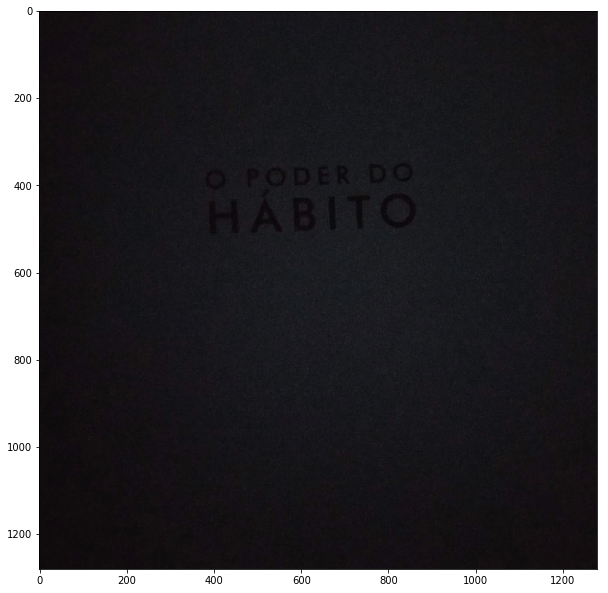

In [20]:
plt.figure(figsize=(10,20))
plt.imshow(img)

# Tratando nossa imagem

In [21]:
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled.shape

(1280, 1280)

In [22]:
retval, threshold = cv2.threshold(grayscaled, 15, 255, cv2.THRESH_BINARY)

# Como isso funciona?
<img src="./threshold.jpg">

In [23]:
print(threshold)

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


### Visualizando nossa imagem

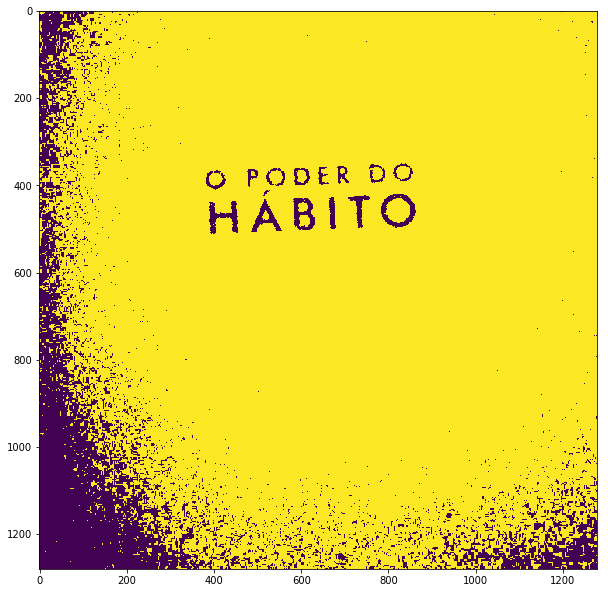

In [24]:
plt.figure(figsize=(10,20))
plt.imshow(threshold)

### Recortando nossa imagem

In [25]:
t_y,b_y,l_x  = 210, 650, 190
cropped_image = threshold[t_y:b_y,l_x:]

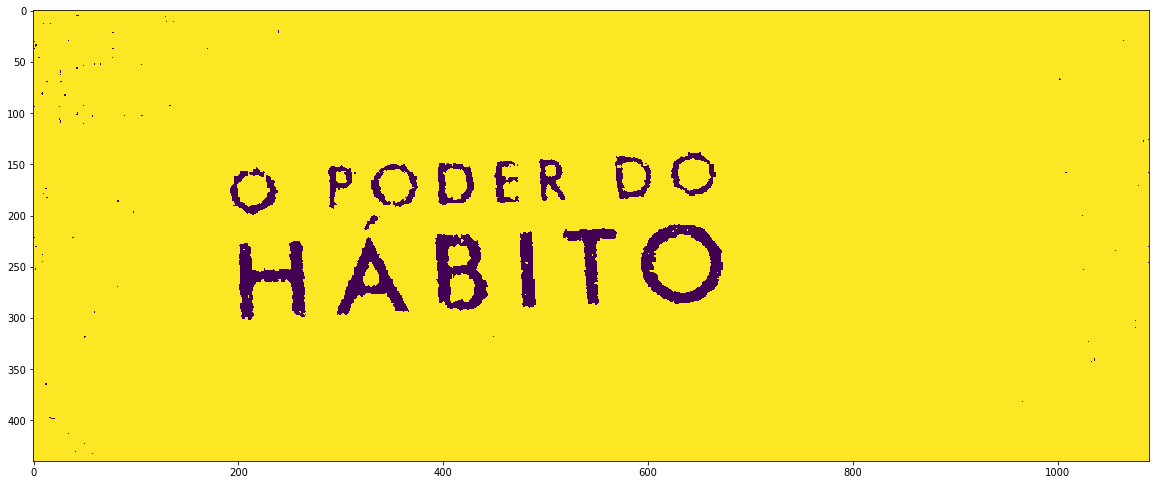

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(cropped_image)

# Convertendo para buffer

In [27]:
def convert2bytes(np_img):
    success, encoded_image = cv2.imencode('.png', np_img)
    if not success:
        raise Exception('something wrong with image conversion to bytes')
    return encoded_image.tobytes()

# Carregando as credenciais do google OCR

In [28]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="google-key.json"

# Fazendo uma request para a google

In [29]:
def OCR(image):
    numpyImage = convert2bytes(image)

    client = vision.ImageAnnotatorClient()
    OCRImage = types.Image(content=numpyImage)
    response = client.document_text_detection(image=OCRImage)
    return response.text_annotations

# Colocando a prova

In [30]:
print("---------grayscaled---------")
texts = OCR(grayscaled)
print(texts)
print("---------img---------")
texts = OCR(img)
print(texts)
print("---------cropped_image---------")
texts = OCR(cropped_image)
print(texts)

---------grayscaled---------
[]
---------img---------
[]
---------cropped_image---------
[locale: "pt-PT"
description: "3. O PODER DO\nHABITO\n"
bounding_poly {
  vertices {
    x: 7
    y: 121
  }
  vertices {
    x: 667
    y: 121
  }
  vertices {
    x: 667
    y: 299
  }
  vertices {
    x: 7
    y: 299
  }
}
, description: "3"
bounding_poly {
  vertices {
    x: 7
    y: 144
  }
  vertices {
    x: 27
    y: 143
  }
  vertices {
    x: 29
    y: 212
  }
  vertices {
    x: 9
    y: 213
  }
}
, description: "."
bounding_poly {
  vertices {
    x: 77
    y: 141
  }
  vertices {
    x: 97
    y: 140
  }
  vertices {
    x: 99
    y: 209
  }
  vertices {
    x: 79
    y: 210
  }
}
, description: "O"
bounding_poly {
  vertices {
    x: 203
    y: 137
  }
  vertices {
    x: 223
    y: 136
  }
  vertices {
    x: 225
    y: 205
  }
  vertices {
    x: 205
    y: 206
  }
}
, description: "PODER"
bounding_poly {
  vertices {
    x: 284
    y: 134
  }
  vertices {
    x: 524
    y: 125
  }

In [31]:
print(texts[0].description)

3. O PODER DO
HABITO



In [32]:
for text in texts:
    print(text.description)

3. O PODER DO
HABITO

3
.
O
PODER
DO
HABITO
